In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/home/pablo/carpetas_escritorio/Técnicatura en ciencias de datos e inteligencia artificial/final_datos/barrios-populares-grupo5/data/data.csv')

### Chequemos las dimensiones del dataframe

In [6]:
df.shape

(5687, 77)

### Hacemos un head para ver que datos tenemos

In [9]:
df.head()

,id_renabap,geometry,renabap_id,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,decada_de_creacion,...,oficio_actividad_construccion_afines,oficio_actividad_elaboracion_de_comidas,oficio_actividad_cartonero_carrero_afines,oficio_actividad_trabajos_domesticos_y_cuidado,oficio_actividad_comunitarias,oficio_actividad_produccion_agropecuaria,oficio_actividad_via_publica_venta_de_productos_y_servicios,oficio_actividad_otros,oficio_actividad_ns_nc,oficio_actividad_transportista
0,1,MULTIPOLYGON (((-58.83350090114561 -34.4812767...,1,Monterrey I,Buenos Aires,Pilar,Presidente Derqui,40.0,44.0,Década 1990,...,6,1,4,0,0,0,6,1,1,0
1,2,MULTIPOLYGON (((-58.01200048352921 -34.9473196...,2,Malvinas II,Buenos Aires,La Plata,José Melchor Romero,290.0,319.0,Década 1990,...,103,9,0,5,0,0,15,18,9,1
2,3,MULTIPOLYGON (((-58.07980353023293 -35.0350737...,3,Ferroviario,Buenos Aires,La Plata,Angel Etcheverry,133.0,146.0,Década 2000,...,4,1,0,0,0,14,2,51,2,1
3,4,MULTIPOLYGON (((-57.97991397438435 -34.9083356...,4,La Favelita,Buenos Aires,La Plata,Tolosa,122.0,134.0,Década 1970,...,0,0,0,0,0,0,0,0,0,0
4,5,MULTIPOLYGON (((-58.06297036682039 -34.9013418...,5,Casaca,Buenos Aires,La Plata,City Bell,20.0,22.0,Década 2000,...,1,0,0,0,0,0,0,4,0,0


### Chequeamos las columnas que tenemos

In [12]:
df.columns

Index(['id_renabap', 'geometry', 'renabap_id', 'nombre_barrio', 'provincia',
       'departamento', 'localidad', 'cantidad_viviendas_aproximadas',
       'cantidad_familias_aproximada', 'decada_de_creacion',
       'anio_de_creacion', 'energia_electrica', 'efluentes_cloacales',
       'agua_corriente', 'cocina', 'calefaccion', 'situacion_dominial',
       'clasificacion_barrio', 'superficie_m2', 'personas_genero_masc',
       'personas_genero_fem', 'personas_genero_otrx',
       'responsable_genero_masc', 'responsable_genero_fem',
       'familia_monoparental_responsable_masculino',
       'familia_monoparental_responsable_femenino',
       'cantidad_certificados_entregados',
       'recibe_asignacion_universal_por_hijo',
       'no_recibe_asignacion_universal_por_hijo',
       'no_sabe_si_recibe_asignacion_universal_por_hijo',
       'tipo_propiedad_de_quienes_vieven_en_ella', 'tipo_propiedad_alquilada',
       'tipo_propiedad_prestada', 'rango_edad_0_a_4_anios',
       'rango_edad_5_

### Preguntas guías y objetivos
----

    ¿Cuál es la provincia con el mayor número de barrios populares inscriptos en el registro?
    ¿Cuál es el departamento con el mayor número de barrios populares inscriptos en el registro?
    ¿Cuáles son los barrios con mayor densidad poblacional de cada provincia?
    ¿Cuántas familias viven allí?
    ¿Cuál es la relación con la propiedad del inmueble?
    ¿Cuáles son las condiciones de acceso a servicios públicos?
    Densidad Poblacional por barrio.
    Cuales son los diez barrios mas antiguos?



### Filtramos columnas
---

In [13]:
# Creamos la lista que contiene el nombre de las columnas con las cuales nos queremos quedar.

lista_de_columnas_ok = ['nombre_barrio', 'provincia','departamento', 'localidad', 
                                'cantidad_viviendas_aproximadas',
                                'cantidad_familias_aproximada','anio_de_creacion',
                                'energia_electrica', 'efluentes_cloacales',
                                'agua_corriente', 'cocina', 'calefaccion', 'situacion_dominial',
                                'clasificacion_barrio', 'superficie_m2', 'personas_genero_masc',
                                'personas_genero_fem', 'personas_genero_otrx',
                                'recibe_asignacion_universal_por_hijo',
                                'tipo_propiedad_de_quienes_vieven_en_ella',
                                'tipo_propiedad_alquilada',
                                'tipo_propiedad_prestada']

# Antes de manipular el dataframe es recomendable guardar una variable que contenga el dataset sin modificaciones.
df_crudo = df

# Ahora si podemos empezar a transformar nuestro dataset.
# Vamos a filtrar las columnas que deseamos trabajar.

df = df[lista_de_columnas_ok]

# Corroboramos cual es el tamaño de nuestro nuevo df con .shape y .columns

df.shape

(5687, 22)

### Chequeamos el tipo de dato de cada columna
----

In [14]:
df.dtypes

nombre_barrio                                object
provincia                                    object
departamento                                 object
localidad                                    object
cantidad_viviendas_aproximadas              float64
cantidad_familias_aproximada                float64
anio_de_creacion                            float64
energia_electrica                            object
efluentes_cloacales                          object
agua_corriente                               object
cocina                                       object
calefaccion                                  object
situacion_dominial                           object
clasificacion_barrio                         object
superficie_m2                                 int64
personas_genero_masc                          int64
personas_genero_fem                           int64
personas_genero_otrx                          int64
recibe_asignacion_universal_por_hijo          int64
tipo_propied

### Verificamos los datos nulos
----

In [15]:
df.isna().any()

nombre_barrio                               False
provincia                                   False
departamento                                False
localidad                                   False
cantidad_viviendas_aproximadas               True
cantidad_familias_aproximada                 True
anio_de_creacion                             True
energia_electrica                           False
efluentes_cloacales                         False
agua_corriente                              False
cocina                                      False
calefaccion                                 False
situacion_dominial                          False
clasificacion_barrio                        False
superficie_m2                               False
personas_genero_masc                        False
personas_genero_fem                         False
personas_genero_otrx                        False
recibe_asignacion_universal_por_hijo        False
tipo_propiedad_de_quienes_vieven_en_ella    False


## Análisis de variable Categórica

In [18]:
# eliminamos algunas columnas porque nos genera inconvenientes
# Cambiamos las columnas de flotantes a enteros para mejorar el análisis

df [['cantidad_viviendas_aproximadas','cantidad_familias_aproximada']] = df[['cantidad_viviendas_aproximadas','cantidad_familias_aproximada']].astype(int)
df.dtypes

nombre_barrio                               object
provincia                                   object
departamento                                object
localidad                                   object
cantidad_viviendas_aproximadas               int64
cantidad_familias_aproximada                 int64
energia_electrica                           object
efluentes_cloacales                         object
agua_corriente                              object
cocina                                      object
calefaccion                                 object
situacion_dominial                          object
clasificacion_barrio                        object
superficie_m2                                int64
personas_genero_masc                         int64
personas_genero_fem                          int64
personas_genero_otrx                         int64
recibe_asignacion_universal_por_hijo         int64
tipo_propiedad_de_quienes_vieven_en_ella     int64
tipo_propiedad_alquilada       

In [19]:
# Con describe() vamos a obtener la totalidad de los datos estadísticos más relevantes
df.describe()

,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,recibe_asignacion_universal_por_hijo,tipo_propiedad_de_quienes_vieven_en_ella,tipo_propiedad_alquilada,tipo_propiedad_prestada
count,5686.000000,5686.000000,5.686000e+03,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000
mean,186.794583,205.545375,1.038101e+05,176.610271,191.222125,0.084770,93.739360,117.799508,3.376011,4.005100
std,473.685766,521.039852,2.172657e+05,372.171406,407.853022,0.410749,193.561121,256.590737,19.149691,9.655207
min,2.000000,2.000000,3.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,37.000000,1.768900e+04,5.000000,6.000000,0.000000,2.000000,4.000000,0.000000,0.000000
50%,80.000000,88.000000,4.470800e+04,60.000000,64.000000,0.000000,31.000000,38.000000,0.000000,1.000000
75%,188.000000,207.000000,1.087955e+05,186.000000,200.000000,0.000000,99.000000,121.000000,2.000000,4.000000
max,14000.000000,15400.000000,9.715558e+06,7789.000000,8724.000000,9.000000,4383.000000,5937.000000,684.000000,160.000000


In [20]:
# Si agregamos el atributo (include='all), nos devuelve también las variables categóricas
df.describe(include='all')

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,energia_electrica,efluentes_cloacales,agua_corriente,cocina,...,situacion_dominial,clasificacion_barrio,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,recibe_asignacion_universal_por_hijo,tipo_propiedad_de_quienes_vieven_en_ella,tipo_propiedad_alquilada,tipo_propiedad_prestada
count,5686,5686,5686,5686,5686.000000,5686.000000,5686,5686,5686,5686,...,5686,5686,5.686000e+03,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000
unique,4019,24,310,900,NaN,NaN,10,7,10,5,...,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sin Nombre,Buenos Aires,Capital,Córdoba Capital,NaN,NaN,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,...,Ninguna seguridad en la tenencia,Asentamiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,150,1933,544,163,NaN,NaN,3292,3711,3228,4954,...,4242,4575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,186.794583,205.545375,NaN,NaN,NaN,NaN,...,NaN,NaN,1.038101e+05,176.610271,191.222125,0.084770,93.739360,117.799508,3.376011,4.005100
std,NaN,NaN,NaN,NaN,473.685766,521.039852,NaN,NaN,NaN,NaN,...,NaN,NaN,2.172657e+05,372.171406,407.853022,0.410749,193.561121,256.590737,19.149691,9.655207
min,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,3.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,34.000000,37.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.768900e+04,5.000000,6.000000,0.000000,2.000000,4.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,80.000000,88.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,4.470800e+04,60.000000,64.000000,0.000000,31.000000,38.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,188.000000,207.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.087955e+05,186.000000,200.000000,0.000000,99.000000,121.000000,2.000000,4.000000


In [23]:
# Solo numéricas

df.describe(include=np.number)

,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,recibe_asignacion_universal_por_hijo,tipo_propiedad_de_quienes_vieven_en_ella,tipo_propiedad_alquilada,tipo_propiedad_prestada
count,5686.000000,5686.000000,5.686000e+03,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000
mean,186.794583,205.545375,1.038101e+05,176.610271,191.222125,0.084770,93.739360,117.799508,3.376011,4.005100
std,473.685766,521.039852,2.172657e+05,372.171406,407.853022,0.410749,193.561121,256.590737,19.149691,9.655207
min,2.000000,2.000000,3.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,37.000000,1.768900e+04,5.000000,6.000000,0.000000,2.000000,4.000000,0.000000,0.000000
50%,80.000000,88.000000,4.470800e+04,60.000000,64.000000,0.000000,31.000000,38.000000,0.000000,1.000000
75%,188.000000,207.000000,1.087955e+05,186.000000,200.000000,0.000000,99.000000,121.000000,2.000000,4.000000
max,14000.000000,15400.000000,9.715558e+06,7789.000000,8724.000000,9.000000,4383.000000,5937.000000,684.000000,160.000000


In [24]:
# Solo categóricas
df.describe(include =object)

,nombre_barrio,provincia,departamento,localidad,energia_electrica,efluentes_cloacales,agua_corriente,cocina,calefaccion,situacion_dominial,clasificacion_barrio
count,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686
unique,4019,24,310,900,10,7,10,5,7,5,3
top,Sin Nombre,Buenos Aires,Capital,Córdoba Capital,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Leña o carbón,Ninguna seguridad en la tenencia,Asentamiento
freq,150,1933,544,163,3292,3711,3228,4954,2098,4242,4575


In [25]:
# Pandas nos permite clasificar a las variables de tipo "objeto" al tipo "categórico", permitieno muchas facilidades

df = df.astype({ 'nombre_barrio': 'category',
 'provincia' : 'category',
 'departamento': 'category',
 'localidad' : 'category',
 'energia_electrica' : 'category',
 'efluentes_cloacales' : 'category',
 'agua_corriente': 'category',
 'cocina' : 'category',
 'calefaccion' : 'category',
 'situacion_dominial' : 'category',
 'clasificacion_barrio' : 'category'    
})

In [26]:
df.describe(include = 'category')

,nombre_barrio,provincia,departamento,localidad,energia_electrica,efluentes_cloacales,agua_corriente,cocina,calefaccion,situacion_dominial,clasificacion_barrio
count,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686
unique,4019,24,310,900,10,7,10,5,7,5,3
top,Sin Nombre,Buenos Aires,Capital,Córdoba Capital,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Leña o carbón,Ninguna seguridad en la tenencia,Asentamiento
freq,150,1933,544,163,3292,3711,3228,4954,2098,4242,4575


### Medidas de tendencia central
---

In [31]:
df.mean(numeric_only=True)

cantidad_viviendas_aproximadas                 186.794583
cantidad_familias_aproximada                   205.545375
superficie_m2                               103810.093915
personas_genero_masc                           176.610271
personas_genero_fem                            191.222125
personas_genero_otrx                             0.084770
recibe_asignacion_universal_por_hijo            93.739360
tipo_propiedad_de_quienes_vieven_en_ella       117.799508
tipo_propiedad_alquilada                         3.376011
tipo_propiedad_prestada                          4.005100
dtype: float64

In [33]:
df.median(numeric_only=True)

cantidad_viviendas_aproximadas                 80.0
cantidad_familias_aproximada                   88.0
superficie_m2                               44708.0
personas_genero_masc                           60.0
personas_genero_fem                            64.0
personas_genero_otrx                            0.0
recibe_asignacion_universal_por_hijo           31.0
tipo_propiedad_de_quienes_vieven_en_ella       38.0
tipo_propiedad_alquilada                        0.0
tipo_propiedad_prestada                         1.0
dtype: float64

In [34]:
df.select_dtypes('category').mode()

,nombre_barrio,provincia,departamento,localidad,energia_electrica,efluentes_cloacales,agua_corriente,cocina,calefaccion,situacion_dominial,clasificacion_barrio
0,Sin Nombre,Buenos Aires,Capital,Córdoba Capital,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Leña o carbón,Ninguna seguridad en la tenencia,Asentamiento


### Medidas de dispersión
---

In [36]:
# rango

df.max(numeric_only=True)

cantidad_viviendas_aproximadas                14000
cantidad_familias_aproximada                  15400
superficie_m2                               9715558
personas_genero_masc                           7789
personas_genero_fem                            8724
personas_genero_otrx                              9
recibe_asignacion_universal_por_hijo           4383
tipo_propiedad_de_quienes_vieven_en_ella       5937
tipo_propiedad_alquilada                        684
tipo_propiedad_prestada                         160
dtype: int64

In [37]:
df.min(numeric_only=True)

cantidad_viviendas_aproximadas                2
cantidad_familias_aproximada                  2
superficie_m2                               368
personas_genero_masc                          0
personas_genero_fem                           0
personas_genero_otrx                          0
recibe_asignacion_universal_por_hijo          0
tipo_propiedad_de_quienes_vieven_en_ella      0
tipo_propiedad_alquilada                      0
tipo_propiedad_prestada                       0
dtype: int64

In [39]:
df.max(numeric_only=True) - df.min(numeric_only=True)

cantidad_viviendas_aproximadas                13998
cantidad_familias_aproximada                  15398
superficie_m2                               9715190
personas_genero_masc                           7789
personas_genero_fem                            8724
personas_genero_otrx                              9
recibe_asignacion_universal_por_hijo           4383
tipo_propiedad_de_quienes_vieven_en_ella       5937
tipo_propiedad_alquilada                        684
tipo_propiedad_prestada                         160
dtype: int64

In [41]:
# Desviación Estandar
df.std(numeric_only=True)

cantidad_viviendas_aproximadas                 473.685766
cantidad_familias_aproximada                   521.039852
superficie_m2                               217265.699370
personas_genero_masc                           372.171406
personas_genero_fem                            407.853022
personas_genero_otrx                             0.410749
recibe_asignacion_universal_por_hijo           193.561121
tipo_propiedad_de_quienes_vieven_en_ella       256.590737
tipo_propiedad_alquilada                        19.149691
tipo_propiedad_prestada                          9.655207
dtype: float64

In [45]:
# Rango intercuartílico 75

df.quantile(0.75)

/tmp/ipykernel_61424/1125622228.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)


cantidad_viviendas_aproximadas                 188.0
cantidad_familias_aproximada                   207.0
superficie_m2                               108795.5
personas_genero_masc                           186.0
personas_genero_fem                            200.0
personas_genero_otrx                             0.0
recibe_asignacion_universal_por_hijo            99.0
tipo_propiedad_de_quienes_vieven_en_ella       121.0
tipo_propiedad_alquilada                         2.0
tipo_propiedad_prestada                          4.0
Name: 0.75, dtype: float64

In [46]:
# Rango intercuartílico 25

df.quantile (0.25)

/tmp/ipykernel_61424/2989488237.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile (0.25)


cantidad_viviendas_aproximadas                 34.0
cantidad_familias_aproximada                   37.0
superficie_m2                               17689.0
personas_genero_masc                            5.0
personas_genero_fem                             6.0
personas_genero_otrx                            0.0
recibe_asignacion_universal_por_hijo            2.0
tipo_propiedad_de_quienes_vieven_en_ella        4.0
tipo_propiedad_alquilada                        0.0
tipo_propiedad_prestada                         0.0
Name: 0.25, dtype: float64

In [47]:
# Rango intercuartilico

df.quantile (0.75) - df.quantile (0.25)

/tmp/ipykernel_61424/4026912134.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile (0.75) - df.quantile (0.25)


cantidad_viviendas_aproximadas                154.0
cantidad_familias_aproximada                  170.0
superficie_m2                               91106.5
personas_genero_masc                          181.0
personas_genero_fem                           194.0
personas_genero_otrx                            0.0
recibe_asignacion_universal_por_hijo           97.0
tipo_propiedad_de_quienes_vieven_en_ella      117.0
tipo_propiedad_alquilada                        2.0
tipo_propiedad_prestada                         4.0
dtype: float64

In [48]:
df.quantile(q=[0.75, 0.50, 0.25]).transpose().rename_axis('variable').reset_index().assign(iqr=lambda df: df[0.75] - df[0.25])

/tmp/ipykernel_61424/2371010268.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(q=[0.75, 0.50, 0.25]).transpose().rename_axis('variable').reset_index().assign(iqr=lambda df: df[0.75] - df[0.25])


,variable,0.75,0.5,0.25,iqr
0,cantidad_viviendas_aproximadas,188.0,80.0,34.0,154.0
1,cantidad_familias_aproximada,207.0,88.0,37.0,170.0
2,superficie_m2,108795.5,44708.0,17689.0,91106.5
3,personas_genero_masc,186.0,60.0,5.0,181.0
4,personas_genero_fem,200.0,64.0,6.0,194.0
5,personas_genero_otrx,0.0,0.0,0.0,0.0
6,recibe_asignacion_universal_por_hijo,99.0,31.0,2.0,97.0
7,tipo_propiedad_de_quienes_vieven_en_ella,121.0,38.0,4.0,117.0
8,tipo_propiedad_alquilada,2.0,0.0,0.0,2.0
9,tipo_propiedad_prestada,4.0,1.0,0.0,4.0


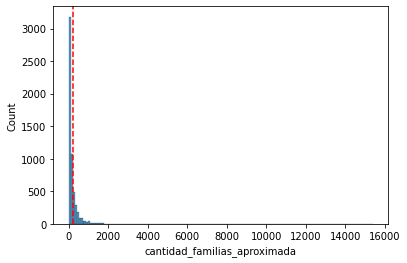

In [50]:
# Histograma
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data = df,
    x = 'cantidad_familias_aproximada',
    binwidth= 100,
    )

plt.axvline(
    x = df.cantidad_familias_aproximada.mean(),
    color = 'red',
    linestyle = 'dashed'
)

/home/pablo/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='superficie_m2'>

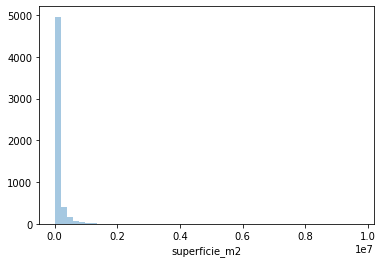

In [51]:
from seaborn import distplot
distplot(df.superficie_m2, kde=False)

## Filtrado por provincias
---

In [52]:
# Agrupamos los datos por la columna de provincia y sumamos la cantidad de barrios

df.provincia.value_counts()

Buenos Aires                       1933
Santa Fe                            408
Chaco                               401
Misiones                            375
Mendoza                             317
Tucumán                             298
Córdoba                             280
Salta                               233
Entre Ríos                          212
Río Negro                           208
Corrientes                          200
Jujuy                               141
Formosa                             111
Neuquén                             102
Santiago del Estero                  93
San Juan                             85
Chubut                               70
Ciudad Autónoma de Buenos Aires      50
Tierra del Fuego                     47
Catamarca                            41
San Luis                             30
La Rioja                             24
Santa Cruz                           22
La Pampa                              5
Name: provincia, dtype: int64

La Provincia con más barrios populares es la provincia de Buenos Aires, con un total de 1933 barrios registrados en el Registro Nacional de Barrios Populares

In [56]:
# Crear una variable en la cual guardar nuestro dataframe filtrado, en este caso por la provincia de Chaco
chaco = df[df['provincia'] == 'Chaco']
chaco

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,energia_electrica,efluentes_cloacales,agua_corriente,cocina,...,situacion_dominial,clasificacion_barrio,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,recibe_asignacion_universal_por_hijo,tipo_propiedad_de_quienes_vieven_en_ella,tipo_propiedad_alquilada,tipo_propiedad_prestada
2035,El Palmarcito,Chaco,San Fernando,Puerto Vilelas,60,66,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,...,Ninguna seguridad en la tenencia,Asentamiento,86022,74,75,0,44,46,0,0
2036,Veinticuatro de Diciembre,Chaco,San Fernando,Resistencia,90,99,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,...,Otro tipo de seguridad en la tenencia,Asentamiento,53449,159,159,0,100,86,0,1
2037,Molina Punta,Chaco,San Fernando,Resistencia,130,143,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Conexión formal a la red de agua con factura,Gas en garrafa,...,Otro tipo de seguridad en la tenencia,Asentamiento,41089,213,199,0,113,121,0,1
2038,Barrio Obrero,Chaco,San Fernando,Puerto Vilelas,20,22,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,...,Ninguna seguridad en la tenencia,Asentamiento,8232,37,49,0,15,22,0,0
2039,Continuación de 152 Viviendas,Chaco,San Fernando,Barranqueras,35,39,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo domiciliaria,Gas en garrafa,...,Ninguna seguridad en la tenencia,Asentamiento,87681,32,44,0,21,29,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,Villa Tomasa,Chaco,San Lorenzo,Villa Berthet,80,88,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Camión cisterna,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,179419,0,0,0,0,0,0,0
4743,San Juan Diego,Chaco,San Lorenzo,Villa Berthet,200,220,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Camión cisterna,Gas en garrafa,...,Otro tipo de seguridad en la tenencia,Asentamiento,169942,0,0,0,0,0,0,0
4744,Sagrado Corazón,Chaco,San Lorenzo,Villa Berthet,400,440,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Camión cisterna,Gas en garrafa,...,Otro tipo de seguridad en la tenencia,Asentamiento,334391,0,0,0,0,0,0,0
4745,Atrás del molino,Chaco,Sargento Cabral,Colonia Elisa,10,11,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,...,Otro tipo de seguridad en la tenencia,Asentamiento,6359,0,0,0,0,0,0,0


In [58]:
# Vamos a calcular de que manera se distribuyen los barrios populares en la provincia del Chaco

chaco['departamento'].value_counts(ascending=False)

San Fernando             183
General Güemes            37
Almirante Brown           23
Comandante Fernández      19
Mayor Luis J. Fontana     17
                        ... 
Garay                      0
Gaiman                     0
Futaleufú                  0
Fray Mamerto Esquiú        0
Zárate                     0
Name: departamento, Length: 310, dtype: int64

In [59]:
chaco = chaco.astype({ 'nombre_barrio': 'object',
 'provincia' : 'object',
 'departamento': 'object',
 'localidad' : 'object',
 'energia_electrica' : 'object',
 'efluentes_cloacales' : 'object',
 'agua_corriente': 'object',
 'cocina' : 'object',
 'calefaccion' : 'object',
 'situacion_dominial' : 'object',
 'clasificacion_barrio' : 'object' 
})

chaco.departamento.value_counts()

San Fernando                     183
General Güemes                    37
Almirante Brown                   23
Comandante Fernández              19
Mayor Luis J. Fontana             17
Libertador General San Martín     16
Independencia                     14
Maipú                             13
25 de mayo                        10
General Belgrano                   8
Bermejo                            7
San Lorenzo                        7
9 de julio                         6
Libertad                           6
Quitilipi                          5
1° de Mayo                         5
Chacabuco                          5
12 de octubre                      4
Fray Justo Santa María de Oro      4
General Donovan                    3
Presidencia de la Plaza            3
2 de abril                         2
O'Higgins                          2
Sargento Cabral                    2
Name: departamento, dtype: int64

In [60]:
chaco.departamento.value_counts() * 100 / (len(chaco.departamento))

San Fernando                     45.635910
General Güemes                    9.226933
Almirante Brown                   5.735661
Comandante Fernández              4.738155
Mayor Luis J. Fontana             4.239401
Libertador General San Martín     3.990025
Independencia                     3.491272
Maipú                             3.241895
25 de mayo                        2.493766
General Belgrano                  1.995012
Bermejo                           1.745636
San Lorenzo                       1.745636
9 de julio                        1.496259
Libertad                          1.496259
Quitilipi                         1.246883
1° de Mayo                        1.246883
Chacabuco                         1.246883
12 de octubre                     0.997506
Fray Justo Santa María de Oro     0.997506
General Donovan                   0.748130
Presidencia de la Plaza           0.748130
2 de abril                        0.498753
O'Higgins                         0.498753
Sargento Ca

In [61]:
# Filtramos por el departamento Güemes
guemes = chaco[chaco['departamento'] == 'General Güemes']
guemes

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,energia_electrica,efluentes_cloacales,agua_corriente,cocina,...,situacion_dominial,clasificacion_barrio,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,recibe_asignacion_universal_por_hijo,tipo_propiedad_de_quienes_vieven_en_ella,tipo_propiedad_alquilada,tipo_propiedad_prestada
3476,Chacra 7,Chaco,General Güemes,Juan José Castelli,73,80,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo comunitaria,Leña o carbón,...,Boleto de compra-venta,Asentamiento,52999,50,36,1,12,31,0,0
3477,Reserva Norte,Chaco,General Güemes,Juan José Castelli,60,66,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión formal a la red de agua con factura,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,24646,77,62,0,40,62,0,1
3478,Chacra 4,Chaco,General Güemes,Juan José Castelli,90,99,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,46258,146,136,0,115,93,0,3
3479,Quinta 14,Chaco,General Güemes,Juan José Castelli,45,50,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Boleto de compra-venta,Asentamiento,44124,47,43,0,31,32,0,1
3480,Chacra 27/28,Chaco,General Güemes,Juan José Castelli,225,248,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Canilla comunitaria dentro del barrio,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,137932,181,232,0,162,127,1,8
3481,Chacra 65,Chaco,General Güemes,Juan José Castelli,70,77,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,48350,89,71,0,52,69,0,0
3482,Reserva Sur,Chaco,General Güemes,Juan José Castelli,150,165,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Gas en garrafa,...,Ninguna seguridad en la tenencia,Asentamiento,155662,193,181,0,128,123,0,5
3483,Opo,Chaco,General Güemes,Juan José Castelli,60,66,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo comunitaria,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,46301,82,78,0,59,56,1,1
3484,Chacra 64,Chaco,General Güemes,Juan José Castelli,35,39,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Camión cisterna,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,18723,34,40,0,20,27,0,1
3485,Chacra 79,Chaco,General Güemes,Juan José Castelli,80,88,No tiene conexión eléctrica,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Boleto de compra-venta,Asentamiento,45903,90,101,0,57,61,0,1


<Axes: ylabel='localidad'>

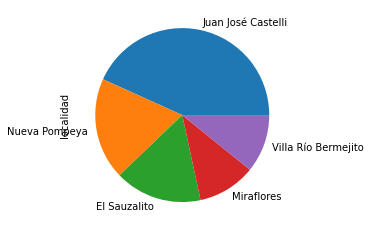

In [62]:
guemes.localidad.value_counts().plot.pie()

In [63]:
# Filtramos por el municipio de Juan José Castelli
castelli = guemes[guemes['localidad'] == 'Juan José Castelli']
castelli

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,energia_electrica,efluentes_cloacales,agua_corriente,cocina,...,situacion_dominial,clasificacion_barrio,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,recibe_asignacion_universal_por_hijo,tipo_propiedad_de_quienes_vieven_en_ella,tipo_propiedad_alquilada,tipo_propiedad_prestada
3476,Chacra 7,Chaco,General Güemes,Juan José Castelli,73,80,Conexión formal a la red con medidor domicilia...,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo comunitaria,Leña o carbón,...,Boleto de compra-venta,Asentamiento,52999,50,36,1,12,31,0,0
3477,Reserva Norte,Chaco,General Güemes,Juan José Castelli,60,66,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión formal a la red de agua con factura,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,24646,77,62,0,40,62,0,1
3478,Chacra 4,Chaco,General Güemes,Juan José Castelli,90,99,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,46258,146,136,0,115,93,0,3
3479,Quinta 14,Chaco,General Güemes,Juan José Castelli,45,50,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Boleto de compra-venta,Asentamiento,44124,47,43,0,31,32,0,1
3480,Chacra 27/28,Chaco,General Güemes,Juan José Castelli,225,248,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Canilla comunitaria dentro del barrio,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,137932,181,232,0,162,127,1,8
3481,Chacra 65,Chaco,General Güemes,Juan José Castelli,70,77,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,48350,89,71,0,52,69,0,0
3482,Reserva Sur,Chaco,General Güemes,Juan José Castelli,150,165,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Gas en garrafa,...,Ninguna seguridad en la tenencia,Asentamiento,155662,193,181,0,128,123,0,5
3483,Opo,Chaco,General Güemes,Juan José Castelli,60,66,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Bomba de agua de pozo comunitaria,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,46301,82,78,0,59,56,1,1
3484,Chacra 64,Chaco,General Güemes,Juan José Castelli,35,39,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Camión cisterna,Leña o carbón,...,Ninguna seguridad en la tenencia,Asentamiento,18723,34,40,0,20,27,0,1
3485,Chacra 79,Chaco,General Güemes,Juan José Castelli,80,88,No tiene conexión eléctrica,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo comunitaria,Leña o carbón,...,Boleto de compra-venta,Asentamiento,45903,90,101,0,57,61,0,1


In [66]:
# Reseteamos el index
castelli.reset_index(drop=True, inplace=True)

In [67]:
# Podemos sumar la cantidad de familias que viven en barrios populares en castelli
# También podemos sumar la cantidad de viviendas que hay en barrios populares en castelli

castelli.cantidad_familias_aproximada.sum()

1787

In [68]:
castelli.cantidad_viviendas_aproximadas.sum()

1623

In [69]:
# ¿Cual barrio tiene mayor cantidad de viviendas y mayor cantidad de familias?

castelli.groupby(['nombre_barrio']).cantidad_viviendas_aproximadas.sum().sort_values(ascending=False)

nombre_barrio
Cancha Aviación        250
Chacra 27/28           225
Chacra 5               200
Reserva Sur            150
Reserva                100
Chacra 31               90
Chacra 4                90
Chacra 79               80
Quinta 24               80
Chacra 7                73
Chacra 65               70
Opo                     60
Reserva Norte           60
Quinta 14               45
Chacra 64               35
Diecinueve de Abril     15
Name: cantidad_viviendas_aproximadas, dtype: int64

In [70]:
# Mayor cantidad de familias
castelli.groupby(['nombre_barrio']).cantidad_familias_aproximada.sum().sort_values(ascending=False)

nombre_barrio
Cancha Aviación        275
Chacra 27/28           248
Chacra 5               220
Reserva Sur            165
Reserva                110
Chacra 31               99
Chacra 4                99
Chacra 79               88
Quinta 24               88
Chacra 7                80
Chacra 65               77
Opo                     66
Reserva Norte           66
Quinta 14               50
Chacra 64               39
Diecinueve de Abril     17
Name: cantidad_familias_aproximada, dtype: int64

In [71]:
# Mayor cantidad de personas de género masculino
castelli.groupby(['nombre_barrio']).personas_genero_masc.sum().sort_values(ascending=False)

nombre_barrio
Chacra 5               249
Reserva Sur            193
Chacra 27/28           181
Chacra 4               146
Chacra 31              135
Reserva                134
Quinta 24               99
Chacra 79               90
Chacra 65               89
Opo                     82
Reserva Norte           77
Chacra 7                50
Quinta 14               47
Chacra 64               34
Diecinueve de Abril     21
Cancha Aviación          0
Name: personas_genero_masc, dtype: int64

In [72]:
castelli.groupby('nombre_barrio').agg(['sum', 'count'])

provincia          departamento                 localidad  \
                          sum count             sum count                 sum   
nombre_barrio                                                                   
Cancha Aviación         Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 27/28            Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 31               Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 4                Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 5                Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 64               Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 65               Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 7                Chaco     1  General Güemes     1  Juan José Castelli   
Chacra 79               Chaco     1  General Güemes     1  Juan José Castelli   
Diecinueve de Abril     Chaco     1  General Güemes     1  Juan José Castelli   
Opo                     Chaco     1  General Güemes     1  Juan José Castelli   
Quinta 14               Chaco     1  General Güemes     1  Juan José Castelli   
Quinta 24               Chaco     1  General Güemes     1  Juan José Castelli   
Reserva                 Chaco     1  General Güemes     1  Juan José Castelli   
Reserva Norte           Chaco     1  General Güemes     1  Juan José Castelli   
Reserva Sur             Chaco     1  General Güemes     1  Juan José Castelli   

                          cantidad_viviendas_aproximadas        \
                    count                            sum count   
nombre_barrio                                                    
Cancha Aviación         1                            250     1   
Chacra 27/28            1                            225     1   
Chacra 31               1                             90     1   
Chacra 4                1                             90     1   
Chacra 5                1                            200     1   
Chacra 64               1                             35     1   
Chacra 65               1                             70     1   
Chacra 7                1                             73     1   
Chacra 79               1                             80     1   
Diecinueve de Abril     1                             15     1   
Opo                     1                             60     1   
Quinta 14               1                             45     1   
Quinta 24               1                             80     1   
Reserva                 1                            100     1   
Reserva Norte           1                             60     1   
Reserva Sur             1                            150     1   

                    cantidad_familias_aproximada        ...  \
                                             sum count  ...   
nombre_barrio                                           ...   
Cancha Aviación                              275     1  ...   
Chacra 27/28                                 248     1  ...   
Chacra 31                                     99     1  ...   
Chacra 4                                      99     1  ...   
Chacra 5                                     220     1  ...   
Chacra 64                                     39     1  ...   
Chacra 65                                     77     1  ...   
Chacra 7                                      80     1  ...   
Chacra 79                                     88     1  ...   
Diecinueve de Abril                           17     1  ...   
Opo                                           66     1  ...   
Quinta 14                                     50     1  ...   
Quinta 24                                     88     1  ...   
Reserva                                      110     1  ...   
Reserva Norte                                 66     1  ...   
Reserva Sur                                  165     1  ...   

                    persona

In [73]:
chaco.groupby('localidad').agg({'cantidad_viviendas_aproximadas': ['min','max'], 'cantidad_familias_aproximada' : ['min','max']})

cantidad_viviendas_aproximadas        \
                                                        min   max   
localidad                                                           
Avia Terai                                               50   220   
Barranqueras                                             16  1000   
Campo Largo                                             200   300   
Charata                                                  25   350   
Colonia Benítez                                         280   280   
Colonia Elisa                                            10    10   
Colonias Unidas                                          20    20   
Concepción Del Bermejo                                   45   120   
Coronel Du Graty                                         15   217   
Corzuela                                                 12   250   
El Sauzalito                                             10   146   
Fontana                                                  13   585   
Gancedo                                                  20    60   
General José de San Martín                               25   250   
General Pinedo                                          150   150   
Hermoso Campo                                           150   150   
Juan José Castelli                                       15   250   
La Clotilde                                              10    10   
La Leonesa                                               45   125   
Las Breñas                                               30   450   
Las Palmas                                               15   130   
Los Frentones                                            10    50   
Machagai                                                 30   910   
Makallé                                                  13    40   
Margarita Belén                                          10    40   
Miraflores                                               50   104   
Napenay                                                  30   130   
Nueva Pompeya                                             8    60   
Pampa Del Indio                                          25   130   
Pampa Del Infierno                                       30   360   
Presidencia De La Plaza                                  10    20   
Presidencia Roque Sáenz Peña                              8  1000   
Puerto Tirol                                             11   200   
Puerto Vilelas                                           13   250   
Quitilipi                                                50   250   
Resistencia                                              15  1600   
San Bernardo                                            200   200   
Santa Sylvina                                            20    80   
Taco Pozo                                                15   200   
Tres Isletas                                             30   500   
Villa Berthet                                            40   400   
Villa Río Bermejito                                      10    43   
Villa Ángela                                             14   300   

                             cantidad_familias_aproximada        
                                                      min   max  
localidad                                                        
Avia Terai                                             55   242  
Barranqueras                                           18  1100  
Campo Largo                                           220   330  
Charata                                                28   385  
Colonia Benítez                                       308   308  
Colonia Elisa                                          11    11  
Colonias Unidas                                        22    22  
Concepción Del Bermejo                                 50   132  
Coronel Du Graty                                       17   239  
Corzuela                                               13   27

In [74]:
castelli.groupby('nombre_barrio').agg({'personas_genero_masc': 'sum', 'personas_genero_fem' : 'sum', 'personas_genero_otrx': 'sum'})

,personas_genero_masc,personas_genero_fem,personas_genero_otrx
nombre_barrio,,,
Cancha Aviación,0,0,0
Chacra 27/28,181,232,0
Chacra 31,135,137,0
Chacra 4,146,136,0
Chacra 5,249,269,0
Chacra 64,34,40,0
Chacra 65,89,71,0
Chacra 7,50,36,1
Chacra 79,90,101,0


In [75]:
genero_barrios = castelli.groupby('nombre_barrio').agg({'personas_genero_masc': 'sum', 'personas_genero_fem' : 'sum', 'personas_genero_otrx': 'sum'})

genero_barrios

,personas_genero_masc,personas_genero_fem,personas_genero_otrx
nombre_barrio,,,
Cancha Aviación,0,0,0
Chacra 27/28,181,232,0
Chacra 31,135,137,0
Chacra 4,146,136,0
Chacra 5,249,269,0
Chacra 64,34,40,0
Chacra 65,89,71,0
Chacra 7,50,36,1
Chacra 79,90,101,0


## Gráficas
---

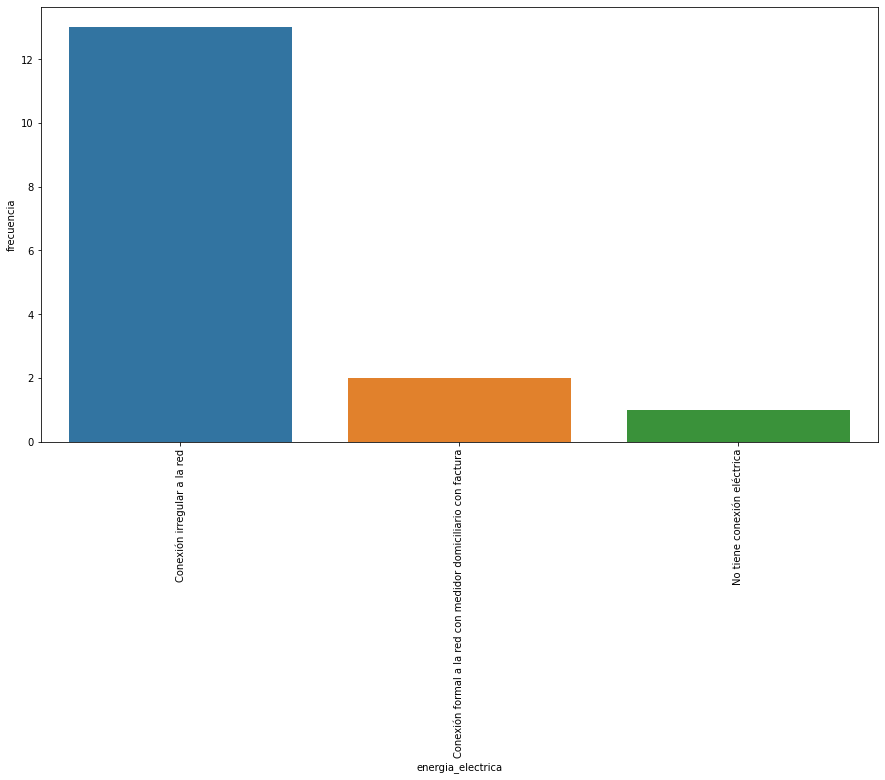

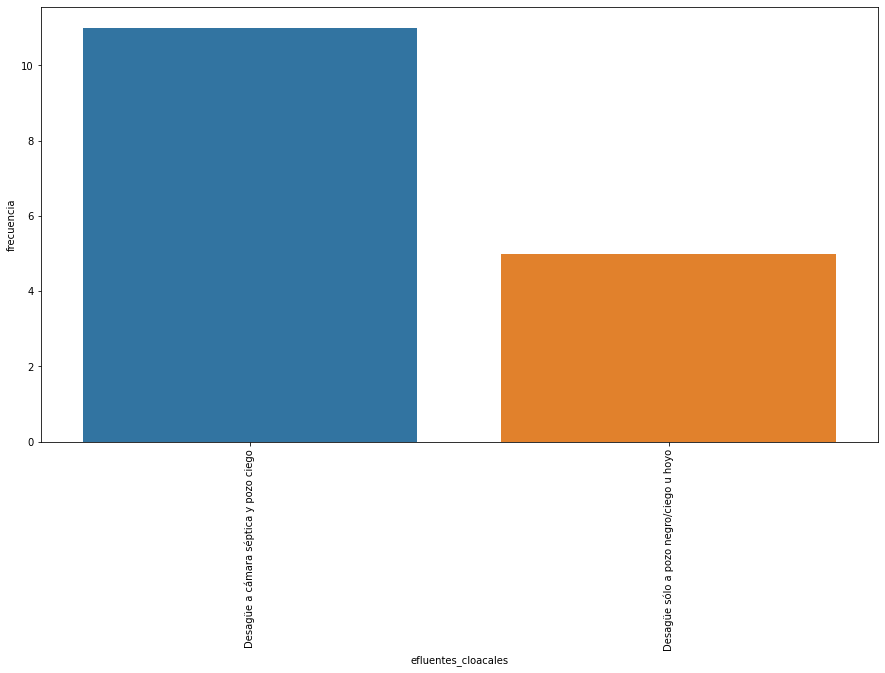

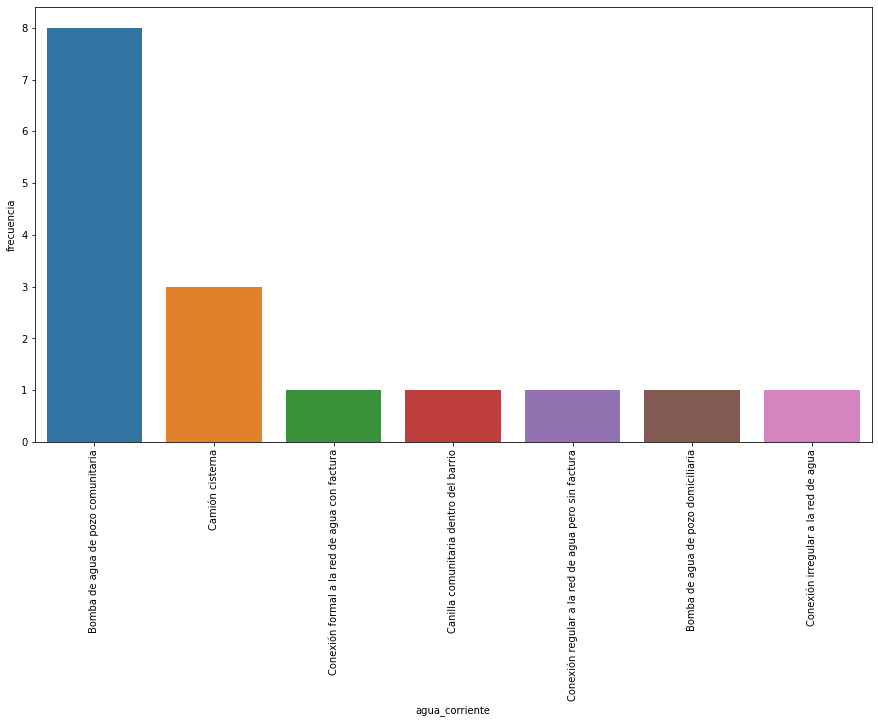

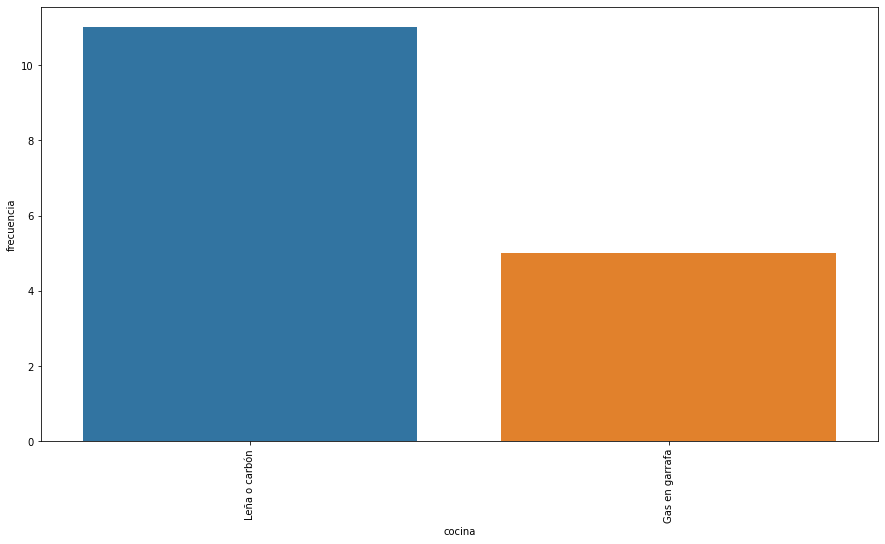

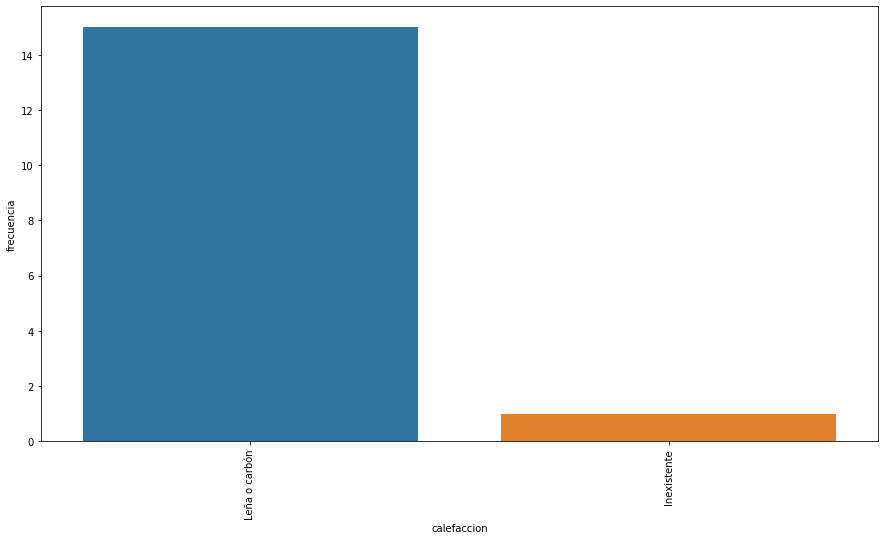

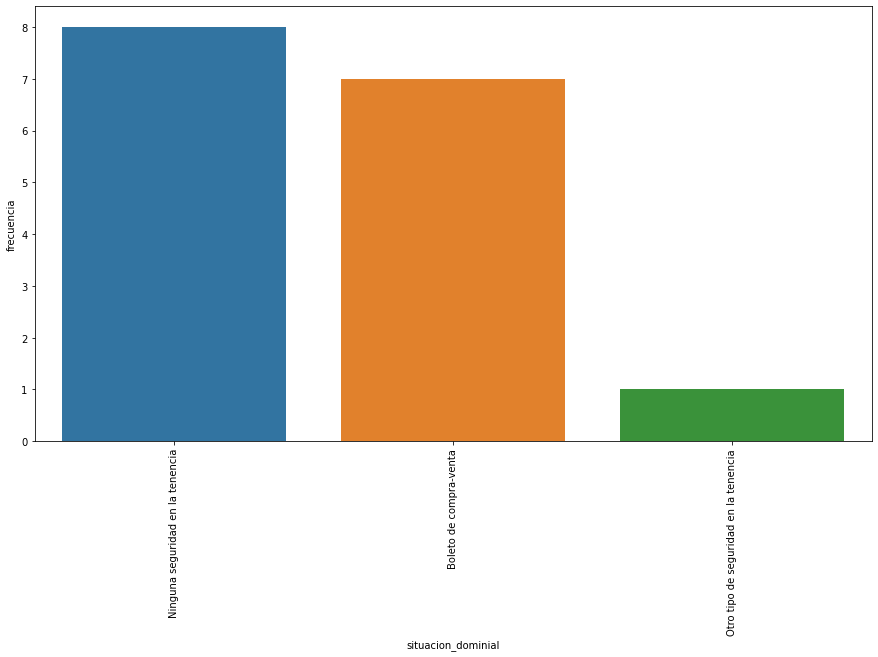

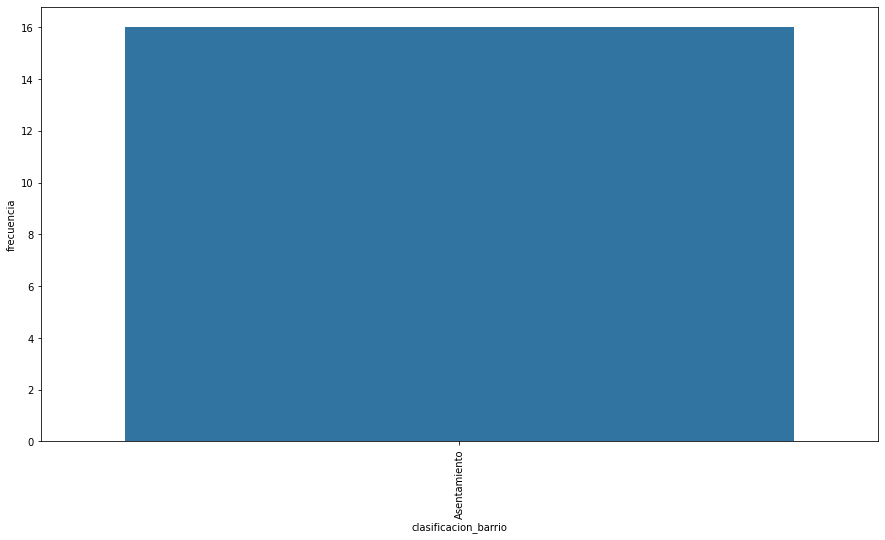

In [79]:
categoricas = ['energia_electrica', 'efluentes_cloacales',
       'agua_corriente', 'cocina', 'calefaccion', 'situacion_dominial',
       'clasificacion_barrio']

numericas = ['superficie_m2',  'cantidad_viviendas_aproximadas',
       'cantidad_familias_aproximada']

for categoria in categoricas:
    frecuencia = castelli[categoria].value_counts()
    df_frecuencia = pd.DataFrame({categoria: frecuencia.index.tolist(), 'frecuencia': frecuencia.tolist()})
    plt.figure(figsize = (15,8))
    sns.barplot(x=categoria, y='frecuencia', data=df_frecuencia)
    plt.xticks(rotation=90)
    plt.show()

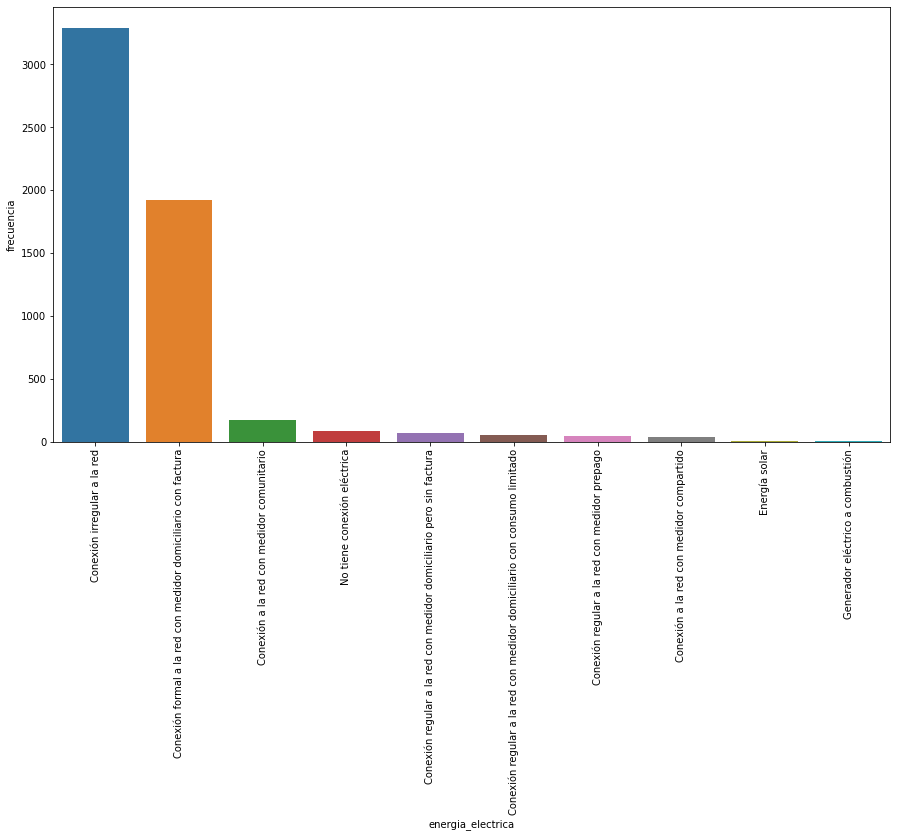

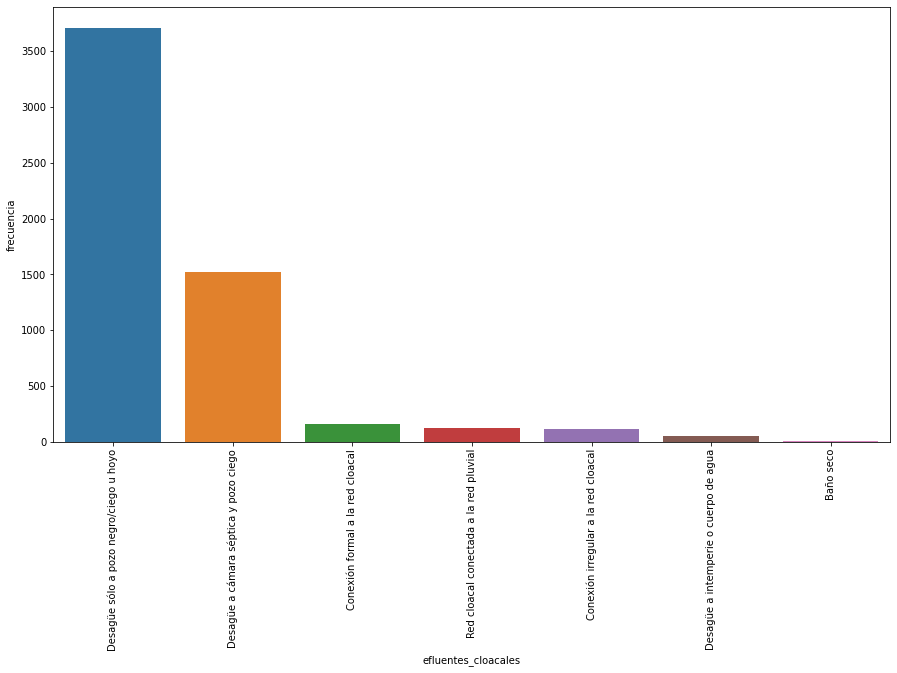

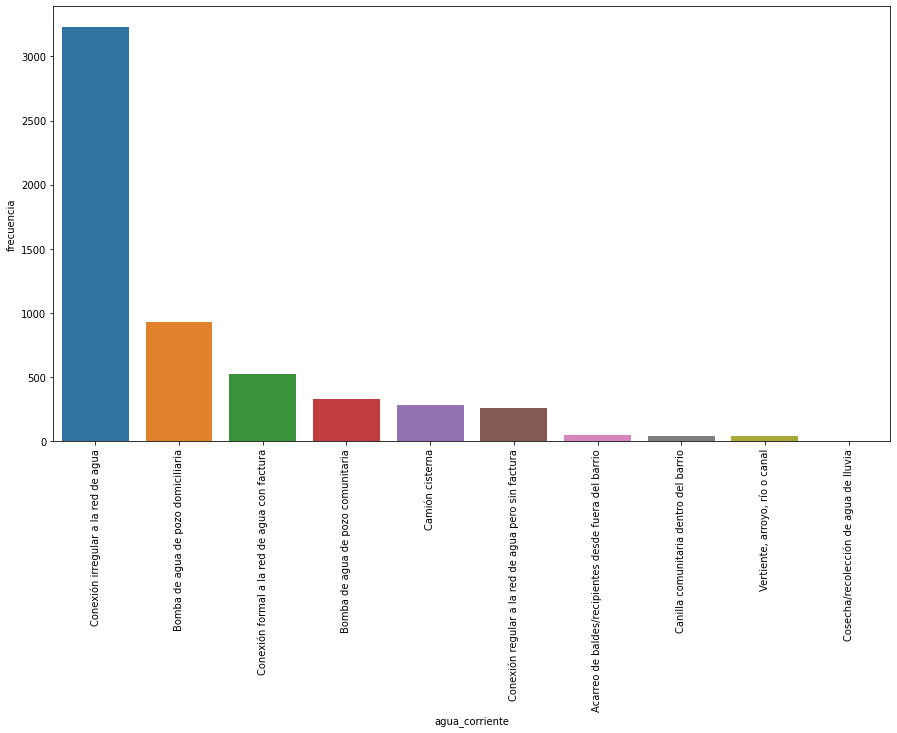

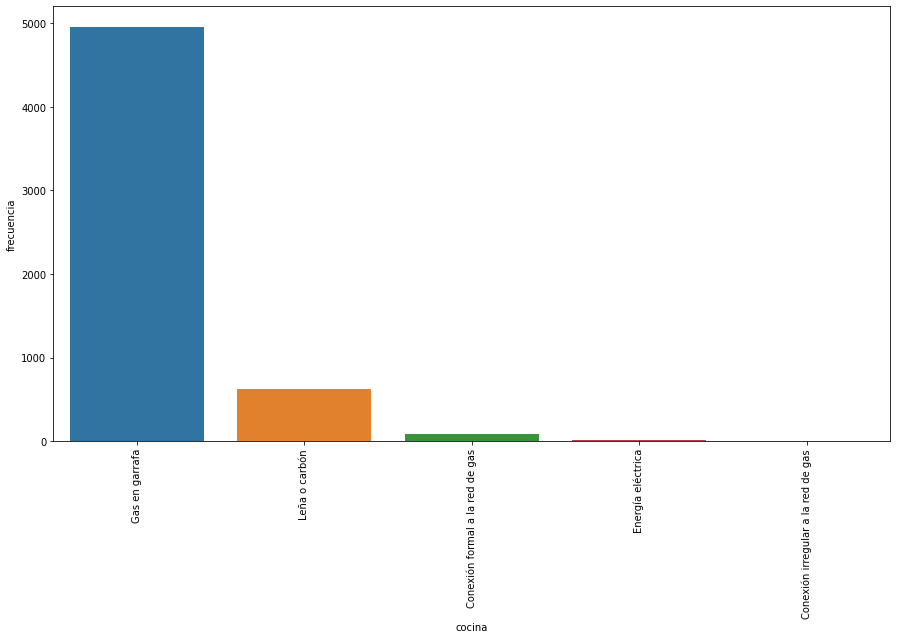

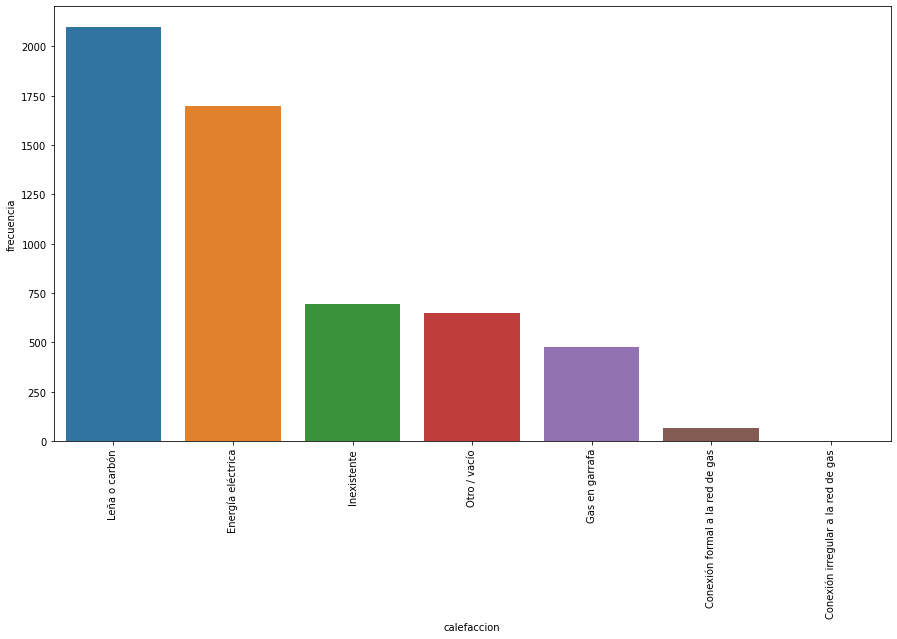

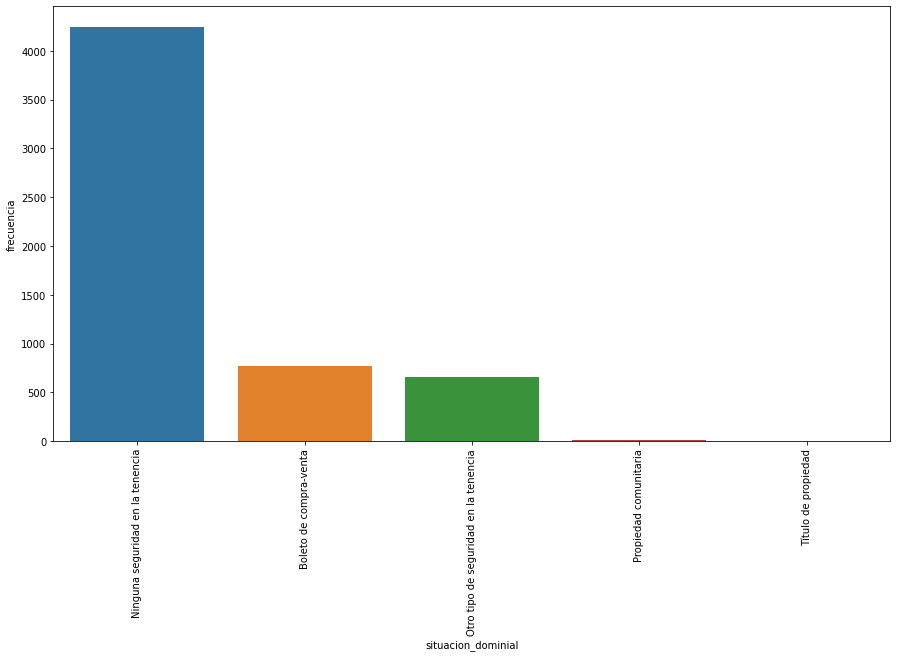

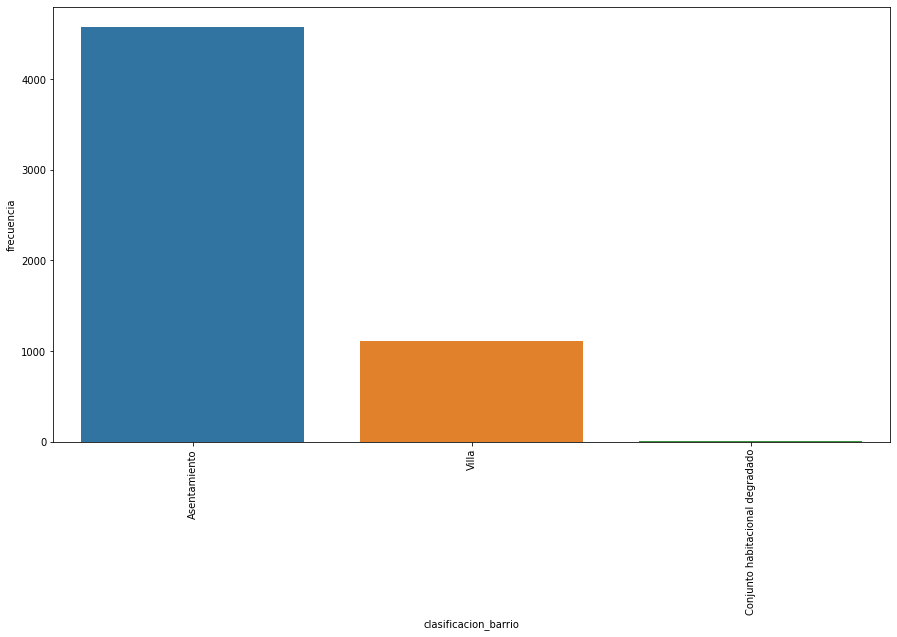

In [78]:
for categoria in categoricas:
    frecuencia = df[categoria].value_counts()
    df_frecuencia = pd.DataFrame({categoria: frecuencia.index.tolist(), 'frecuencia': frecuencia.tolist()})
    plt.figure(figsize = (15,8))
    sns.barplot(x=categoria, y='frecuencia', data=df_frecuencia)
    plt.xticks(rotation=90)
    plt.show()

<Axes: ylabel='energia_electrica'>

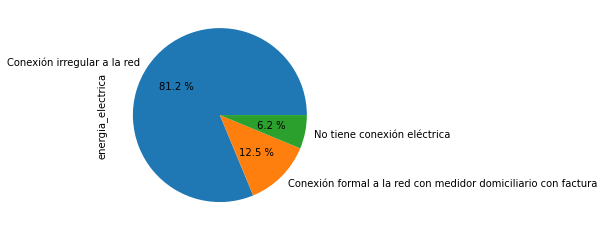

In [80]:
castelli.energia_electrica.value_counts().plot.pie(autopct="%0.1f %%")

<Axes: >

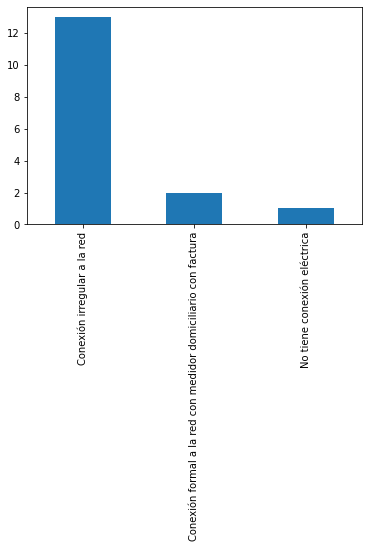

In [81]:
castelli.energia_electrica.value_counts().plot.bar()

<Axes: ylabel='efluentes_cloacales'>

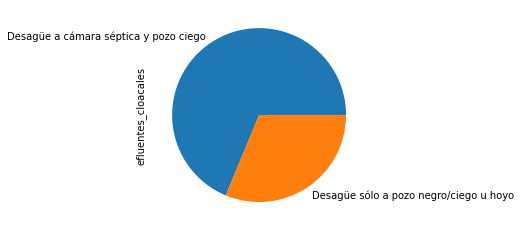

In [82]:
castelli.efluentes_cloacales.value_counts().plot.pie()

<Axes: >

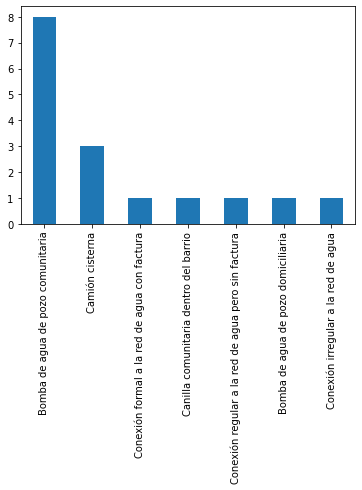

In [83]:
castelli.agua_corriente.value_counts().plot.bar()

In [85]:
porcentaje_familias_cobran = castelli['recibe_asignacion_universal_por_hijo'] * 100 / (castelli['cantidad_familias_aproximada'])
porcentaje_familias_cobran

0      15.000000
1      60.606061
2     116.161616
3      62.000000
4      65.322581
5      67.532468
6      77.575758
7      89.393939
8      51.282051
9      64.772727
10     72.727273
11     74.545455
12     57.575758
13     35.294118
14     59.090909
15      0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

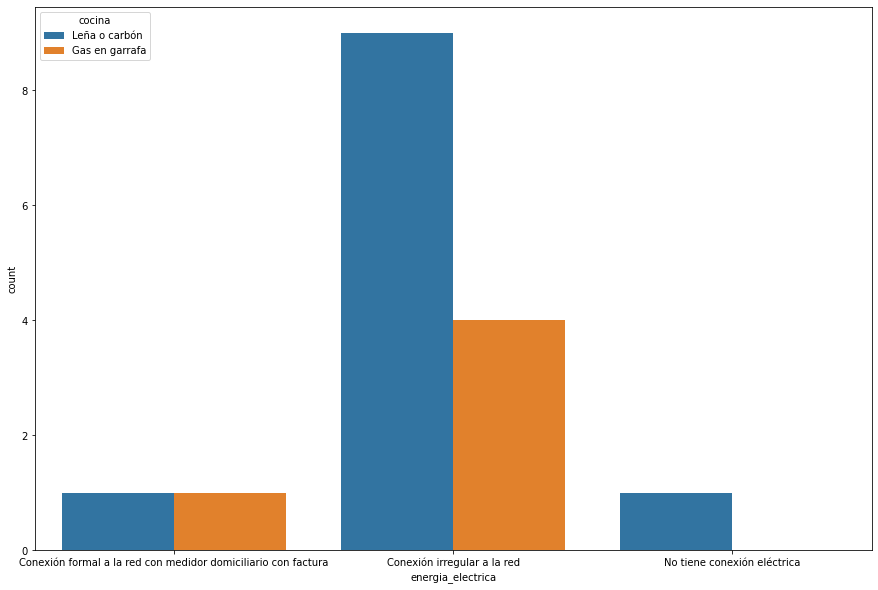

In [86]:
plt.figure (figsize=(15,10))
sns.countplot(data = castelli, x='energia_electrica', hue='cocina')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

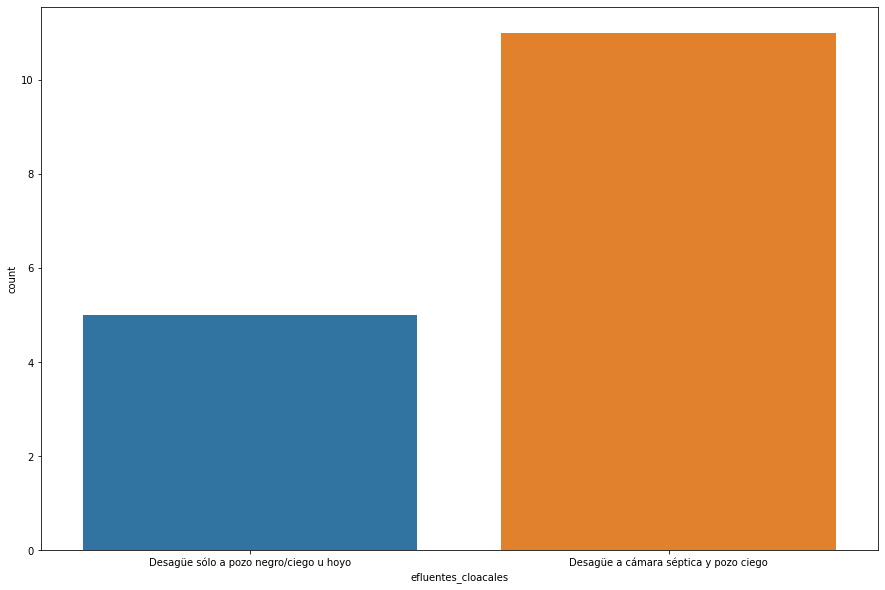

In [87]:
plt.figure (figsize=(15,10))
sns.countplot(data = castelli, x='efluentes_cloacales')
plt.show